In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

First Stage of Data Processing is Data **gathering**

In [4]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749.0,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608.0,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258.0,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974.0,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877.0,Subscriber,1973.0,Male,No


# data **understanding**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             4867 non-null   int64  
 1   start_time               4867 non-null   object 
 2   end_time                 4867 non-null   object 
 3   start_station_id         4867 non-null   int64  
 4   start_station_name       4867 non-null   object 
 5   start_station_latitude   4867 non-null   float64
 6   start_station_longitude  4867 non-null   float64
 7   end_station_id           4866 non-null   float64
 8   end_station_name         4866 non-null   object 
 9   end_station_latitude     4866 non-null   float64
 10  end_station_longitude    4866 non-null   float64
 11  bike_id                  4866 non-null   float64
 12  user_type                4866 non-null   object 
 13  member_birth_year        4668 non-null   float64
 14  member_gender           

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,4867.000000,4867.000000,4867.000000,4867.000000,4866.000000,4866.000000,4866.000000,4866.000000,4668.000000
mean,766.900555,139.198069,37.759640,-122.314387,145.549733,37.696459,-122.136717,1954.180641,1984.451371
std,2049.924559,116.279428,0.122133,1.587541,116.812945,1.534754,4.958785,1152.886624,10.212127
min,61.000000,3.000000,37.316736,-122.453704,3.000000,0.000000,-122.453704,12.000000,1896.000000
25%,355.000000,42.000000,37.770733,-122.408445,50.000000,37.769218,-122.410807,1003.000000,1980.000000
50%,550.000000,95.000000,37.781074,-122.395282,109.000000,37.780146,-122.395526,1888.500000,1987.000000
75%,844.500000,243.000000,37.797280,-122.273245,243.000000,37.797280,-122.276040,2997.000000,1992.000000
max,78969.000000,417.000000,37.880222,-12.000000,420.000000,37.880222,0.000000,4230.000000,2000.000000


In [8]:
df.describe(include = 'object')

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,4867,4867,4867,4866,4866,4668,4866
unique,4866,4867,326,338,2,3,2
top,2019-04-30 18:09:13.2820,2019-05-01 12:32:20.4540,San Francisco Caltrain Station 2 (Townsend St...,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,1,101,225,4253,3488,4338


In [9]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
df.shape

(4867, 16)

# **Data PreProcessing**

In [11]:
df = df.drop_duplicates()

In [12]:
(df.isna().sum() / df.shape[0] )* 100

,0
duration_sec,0.000000
start_time,0.000000
end_time,0.000000
start_station_id,0.000000
start_station_name,0.000000
start_station_latitude,0.000000
start_station_longitude,0.000000
end_station_id,0.020547
end_station_name,0.020547
end_station_latitude,0.020547


In [13]:
#  getting the Age from the Members using birthyear
df['age'] = 2019 - df['member_birth_year']

In [14]:
df.drop(['member_birth_year','start_station_latitude','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis = 1,inplace = True)

In [15]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749.0,Subscriber,Female,No,30.0
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246,Berkeley Civic Center,241.0,Ashby BART Station,2608.0,Customer,NaN,No,NaN
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64,5th St at Brannan St,64.0,5th St at Brannan St,258.0,Subscriber,Male,No,26.0
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974.0,Subscriber,Male,No,47.0
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877.0,Subscriber,Male,No,46.0
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234.0,Customer,Male,No,22.0
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202,Washington St at 8th St,220.0,San Pablo Ave at MLK Jr Way,3262.0,Subscriber,Male,Yes,43.0
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44,Civic Center/UN Plaza BART Station (Market St ...,121.0,Mission Playground,2706.0,Customer,Male,No,46.0
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21,Montgomery St BART Station (Market St at 2nd St),64.0,5th St at Brannan St,860.0,Subscriber,Male,No,33.0
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28,The Embarcadero at Bryant St,126.0,Esprit Park,896.0,Subscriber,Male,No,24.0


In [16]:
# getting the Strat Time and the endtime
start_time = pd.to_datetime(df['start_time'])
end_time = pd.to_datetime(df['end_time'])

In [17]:
df['Start_time'] = start_time.dt.time
df['end_Time'] = end_time.dt.time

In [18]:
# getting the day
df['start_day']= start_time.dt.day_name()
df['end_day'] = end_time.dt.day_name()

In [19]:
# drop the unusefful columns
df.drop(['start_time','end_time'],axis = 1 , inplace = True)

In [20]:
# changig the duration secounds to minutes
df['Deuratio_min'] = df['duration_sec']/60

In [21]:
# change the data type of Duration Min to int to get rid of .
df['Deuratio_min']=df['Deuratio_min'].astype(int)

In [22]:
df.drop('duration_sec',axis = 1 , inplace = True)

In [23]:
# remove the null values in age column
df = df[df['age'].notna()]

In [24]:
df['age'] = df['age'].astype(int)

In [25]:
df.columns

Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age', 'Start_time', 'end_Time', 'start_day',
       'end_day', 'Deuratio_min'],
      dtype='object')

In [26]:
df

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Start_time,end_Time,start_day,end_day,Deuratio_min
0,368,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749.0,Subscriber,Female,No,30,22:33:55.155000,12:32:20.454000,Tuesday,Wednesday,838
2,64,5th St at Brannan St,64.0,5th St at Brannan St,258.0,Subscriber,Male,No,26,10:32:46.489000,08:13:58.975000,Tuesday,Wednesday,1301
3,67,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974.0,Subscriber,Male,No,47,10:00:51.550000,07:57:01.262000,Tuesday,Wednesday,1316
4,124,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877.0,Subscriber,Male,No,46,23:59:04.739000,00:17:53.091000,Tuesday,Wednesday,18
5,243,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234.0,Customer,Male,No,22,23:53:05.982000,00:16:14.313000,Tuesday,Wednesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,384,Jackson St at Polk St,61.0,Howard St at 8th St,2446.0,Subscriber,Male,No,27,10:39:56.880000,10:52:17.610000,Tuesday,Tuesday,12
4862,22,Howard St at Beale St,50.0,2nd St at Townsend St,2999.0,Subscriber,Female,No,31,10:44:24.586000,10:52:03.832000,Tuesday,Tuesday,7
4863,188,Dover St at 57th St,340.0,Harmon St at Adeline St,1320.0,Subscriber,Male,No,35,10:46:34.785000,10:51:59.714000,Tuesday,Tuesday,5
4864,61,Howard St at 8th St,79.0,7th St at Brannan St,2306.0,Subscriber,Male,No,45,10:44:50.258000,10:51:40.406000,Tuesday,Tuesday,6


Some Questions I have asked it myself :


---



*   whose more gender Ride bike ?

*   Age Vs RideBike

*   Most Station Used start Trip and End Trip

*   Iss there any relation between User_Type and deuration time ?

*   What is the average trip duration for different user types?

*   Which days of the week have the highest and lowest number of trips?


*   Which bike is the most used in the day ?

*   Age vs Duration

*   Gender vs Duration time














# We Try To Visualize Data Visualization

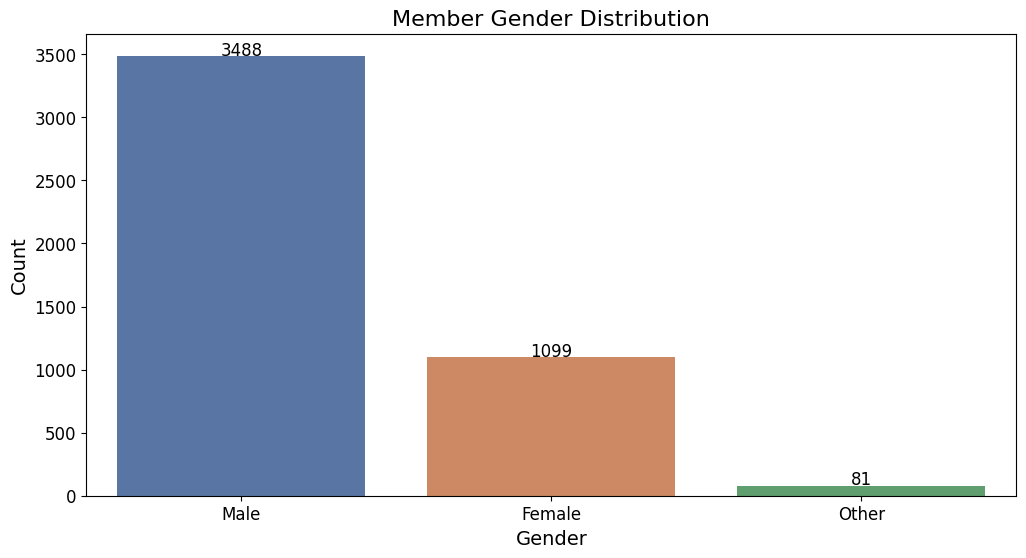

In [27]:
plt.figure(figsize=(12, 6))  # Adjusted for better visualization
plt.title('Member Gender Distribution', fontsize=16)

# Count the number of occurrences for each gender
gender_counts = df['member_gender'].value_counts()

# Plot using Seaborn
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='deep')

for i, val in enumerate(gender_counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=12)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Most Likely To See That Male Used Bikes more than Female and Others

# Age Vs RideBike

In [28]:

df['age'].value_counts().sort_values(ascending = True).head(10)

,count
age,
73,1
123,1
119,1
68,1
72,2
71,2
65,4
66,6
67,6


Text(0, 0.5, 'Count')

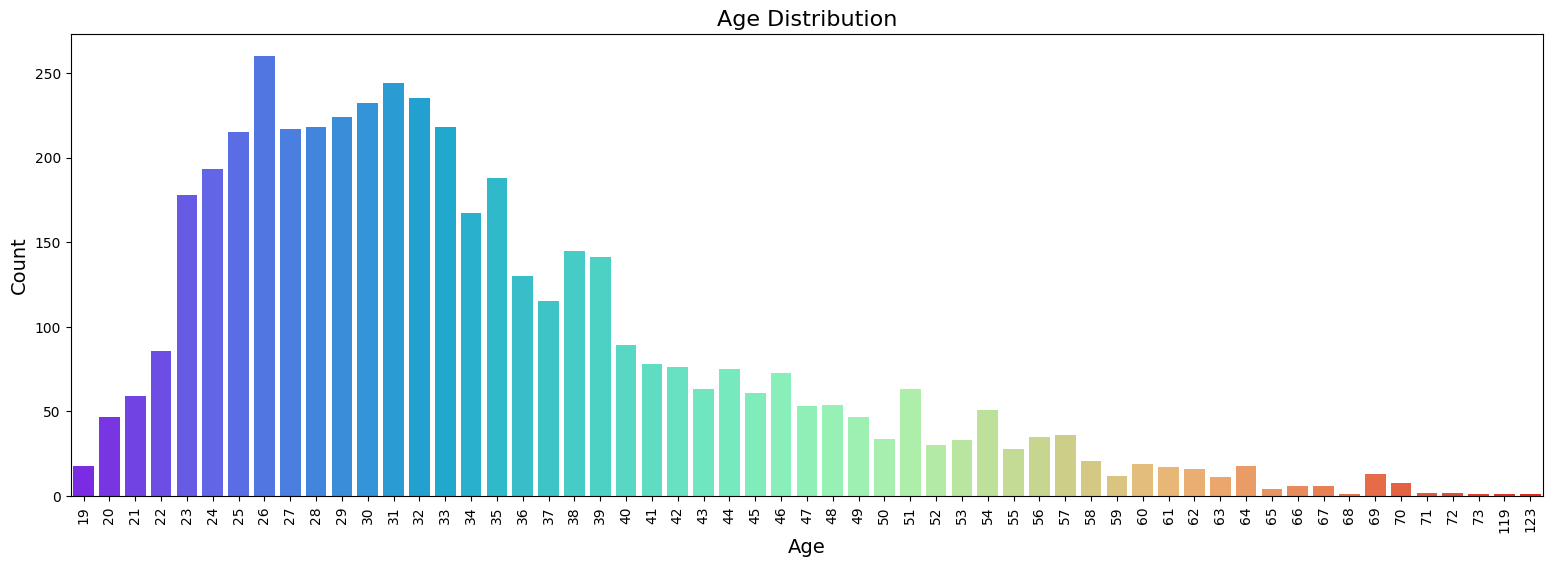

In [29]:
plt.figure(figsize=(19, 6))  # Adjusted for better visualization
plt.title('Age Distribution', fontsize=16)
plt.xticks(rotation = 90 , fontsize = 10)
sns.countplot(data = df , x = 'age' , palette='rainbow')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Most Likely that age between 27 and 32 are the Most Using Bikes

# Most Station Used start Trip and End Trip

In [30]:
df['start_station_name'].value_counts()

,count
start_station_name,
San Francisco Caltrain Station 2 (Townsend St at 4th St),100
2nd St at Townsend St,89
Berry St at 4th St,85
Howard St at Beale St,84
Powell St BART Station (Market St at 5th St),84
...,...
Ellsworth St at Russell St,1
Market St at 8th St,1
Auzerais Ave at Los Gatos Creek Trail,1


In [31]:
df.groupby('start_station_name')['start_station_name'].count().sort_values(ascending = False).head(10)

,start_station_name
start_station_name,
San Francisco Caltrain Station 2 (Townsend St at 4th St),100
2nd St at Townsend St,89
Berry St at 4th St,85
Powell St BART Station (Market St at 5th St),84
Howard St at Beale St,84
Market St at 10th St,81
Montgomery St BART Station (Market St at 2nd St),77
Powell St BART Station (Market St at 4th St),72
4th St at Mission Bay Blvd S,70


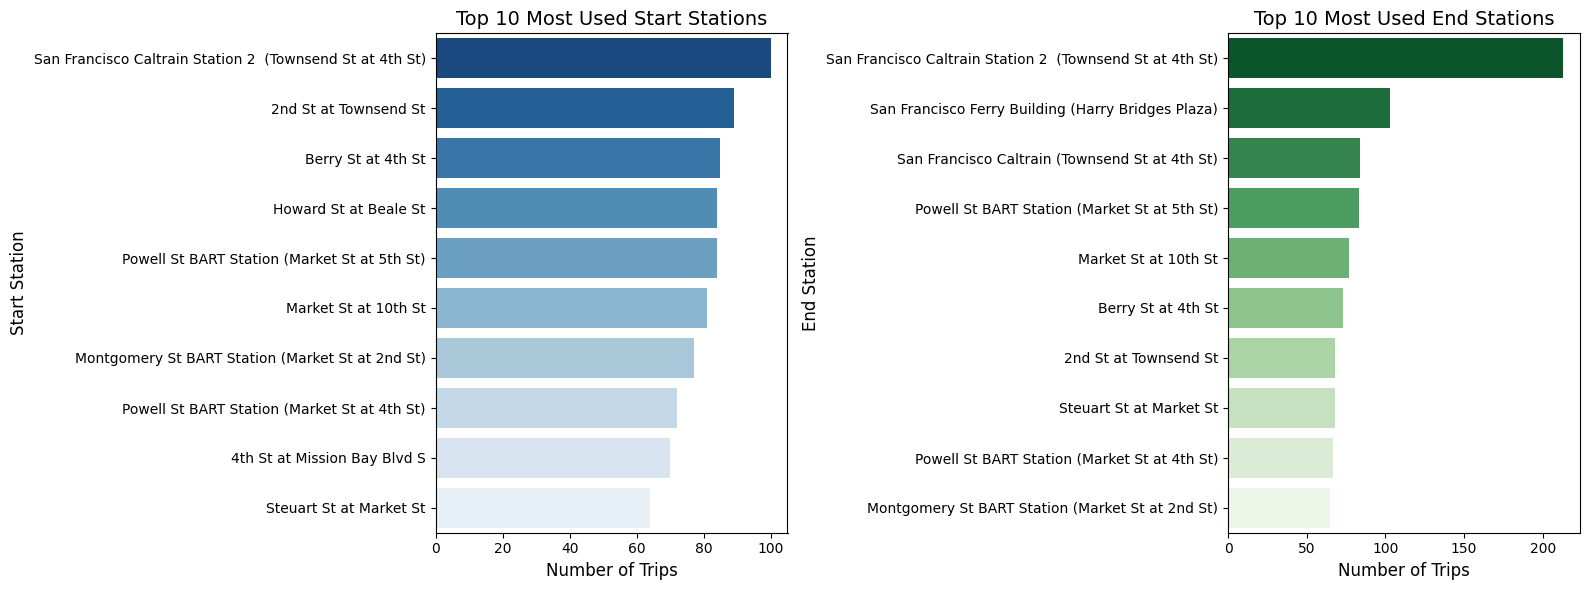

In [32]:
# Top 10 Start Stations
top_start_stations = df['start_station_name'].value_counts().head(10)

# Top 10 End Stations
top_end_stations = df['end_station_name'].value_counts().head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Most Used Start Stations
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Most Used Start Stations', fontsize=14)
axes[0].set_xlabel('Number of Trips', fontsize=12)
axes[0].set_ylabel('Start Station', fontsize=12)

# Most Used End Stations
sns.barplot(x=top_end_stations.values, y=top_end_stations.index, palette='Greens_r', ax=axes[1])
axes[1].set_title('Top 10 Most Used End Stations', fontsize=14)
axes[1].set_xlabel('Number of Trips', fontsize=12)
axes[1].set_ylabel('End Station', fontsize=12)

plt.tight_layout()
plt.show()




*   **The Most Used Start Stations is San Francisco Caltrain Station 2**

*   **The Most Used End Stations is San Francisco Caltrain Station 2**




**Iss there any relation between User_Type and deuration time ?**

<Axes: title={'center': 'detecting outliers in Duration Time'}, xlabel='Duration Time in minutes'>

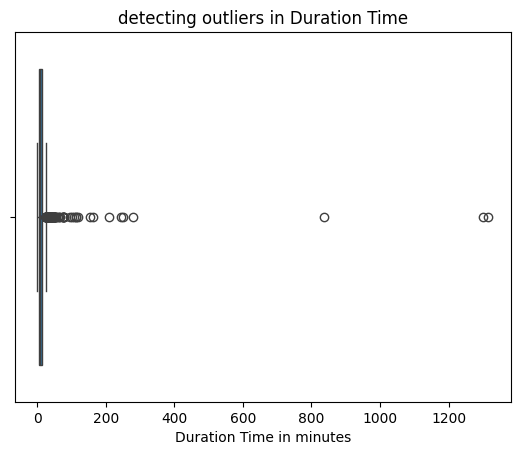

In [33]:
plt.title("detecting outliers in Duration Time")
plt.xlabel("Duration Time in minutes")
sns.boxplot(data = df , x = 'Deuratio_min')

In [34]:
val = df.groupby('user_type')['Deuratio_min'].mean()

# **Average Of Duration Time**

In [35]:
var = df['Deuratio_min'].mean()
print(f"The Mean Value of Duration Time is : {var}")

The Mean Value of Duration Time is : 11.664738646101114


# **The Mean Value of Duration Time is : 12.374359401874408**

Text(0.5, 0, 'User Type')

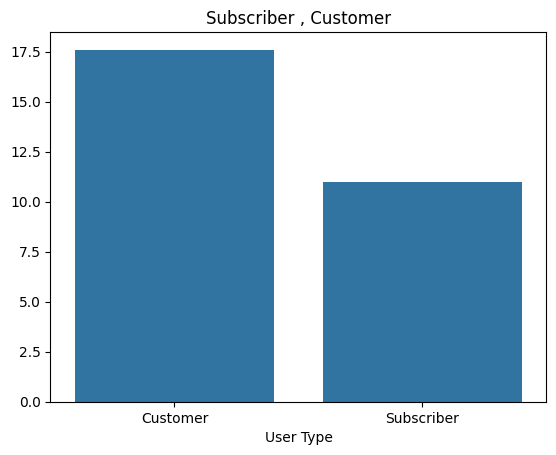

In [36]:
sns.barplot(x = val.index , y = val.values)
plt.title("Subscriber , Customer")
plt.xlabel("User Type")

In [37]:
 df_Customers = df[df['user_type'] =="Customer"]
 df_Subscriber = df[df['user_type'] =="Subscriber"]

# The Averga Duration of Each user Type

In [38]:
print(f"The Averga eDuraton time for customer : {df_Customers['Deuratio_min'].mean()}")
print(f"The Averga eDuraton time for Subscriber : {df_Subscriber['Deuratio_min'].mean()}")


The Averga eDuraton time for customer : 17.597560975609756
The Averga eDuraton time for Subscriber : 10.965756704980842


# Which days of the week have the highest and lowest number of trips?

In [39]:
df['start_day'].value_counts()

,count
start_day,
Tuesday,4668


In [40]:
df['end_day'].value_counts()

,count
end_day,
Tuesday,4655
Wednesday,13


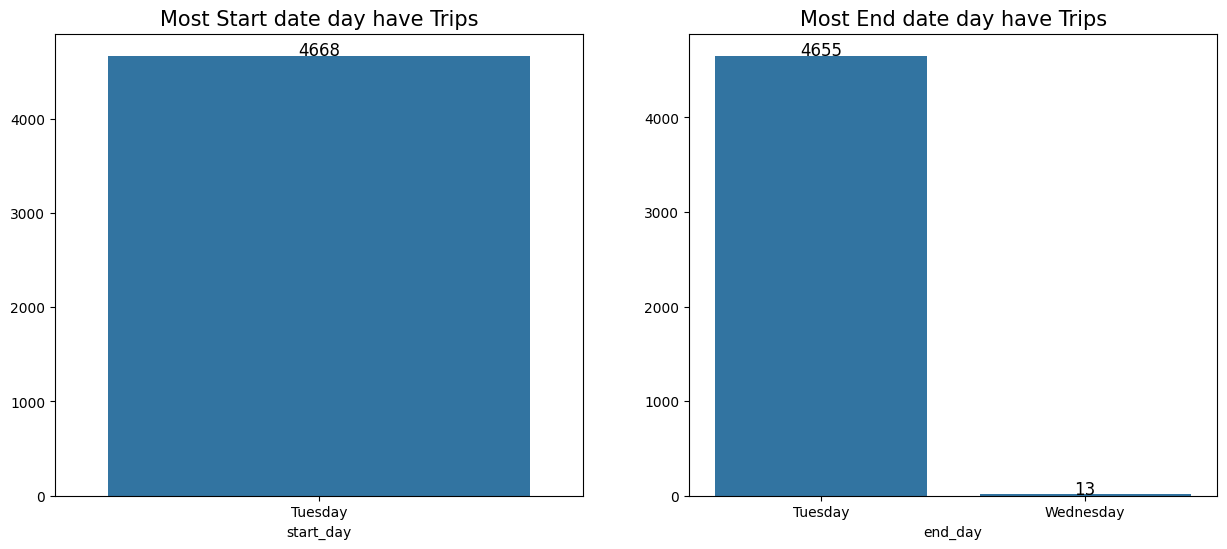

In [41]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x = df['start_day'].value_counts().index , y = df['start_day'].value_counts().values)
plt.title("Most Start date day have Trips",fontsize = 15)

for i in range(len(df['start_day'].value_counts())):
  plt.text(i,df['start_day'].value_counts()[i] + 5,df['start_day'].value_counts()[i] , ha= 'center' , fontsize = 12)


plt.subplot(1,2,2)
sns.barplot(x = df['end_day'].value_counts().index , y = df['end_day'].value_counts().values)
for i in range(len(df['end_day'].value_counts())):
  plt.text(i,df['end_day'].value_counts()[i] + 5,df['end_day'].value_counts()[i] , ha= 'center' , fontsize = 12)

plt.title("Most End date day have Trips",fontsize = 15)

plt.show()

In [42]:
bikes_used_customer = df_Customers['bike_id'].value_counts().head(10)
bikes_used_subs = df_Subscriber['bike_id'].value_counts().head(10)

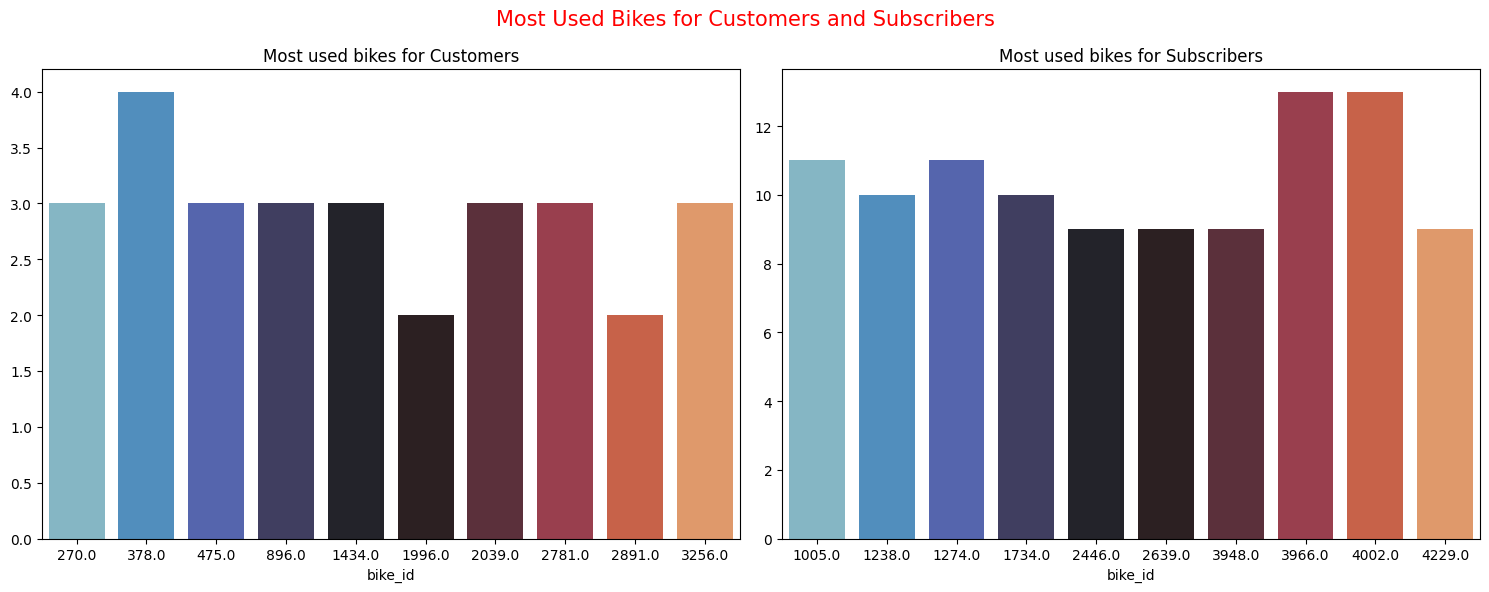

In [43]:
plt.figure(figsize = (15,6))

plt.suptitle("Most Used Bikes for Customers and Subscribers",fontsize = 15 , color = 'red')
plt.subplot(1,2,1)
plt.title("Most used bikes for Customers")
sns.barplot(x = bikes_used_customer.index , y = bikes_used_customer.values , palette = 'icefire')

plt.subplot(1,2,2)
plt.title("Most used bikes for Subscribers")
sns.barplot(x = bikes_used_subs.index , y = bikes_used_subs.values , palette = 'icefire')

plt.tight_layout()
plt.show()

# **Age Vs Duration **

In [44]:
df

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Start_time,end_Time,start_day,end_day,Deuratio_min
0,368,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749.0,Subscriber,Female,No,30,22:33:55.155000,12:32:20.454000,Tuesday,Wednesday,838
2,64,5th St at Brannan St,64.0,5th St at Brannan St,258.0,Subscriber,Male,No,26,10:32:46.489000,08:13:58.975000,Tuesday,Wednesday,1301
3,67,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974.0,Subscriber,Male,No,47,10:00:51.550000,07:57:01.262000,Tuesday,Wednesday,1316
4,124,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877.0,Subscriber,Male,No,46,23:59:04.739000,00:17:53.091000,Tuesday,Wednesday,18
5,243,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234.0,Customer,Male,No,22,23:53:05.982000,00:16:14.313000,Tuesday,Wednesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,384,Jackson St at Polk St,61.0,Howard St at 8th St,2446.0,Subscriber,Male,No,27,10:39:56.880000,10:52:17.610000,Tuesday,Tuesday,12
4862,22,Howard St at Beale St,50.0,2nd St at Townsend St,2999.0,Subscriber,Female,No,31,10:44:24.586000,10:52:03.832000,Tuesday,Tuesday,7
4863,188,Dover St at 57th St,340.0,Harmon St at Adeline St,1320.0,Subscriber,Male,No,35,10:46:34.785000,10:51:59.714000,Tuesday,Tuesday,5
4864,61,Howard St at 8th St,79.0,7th St at Brannan St,2306.0,Subscriber,Male,No,45,10:44:50.258000,10:51:40.406000,Tuesday,Tuesday,6


In [47]:
values = df.groupby('age')['Deuratio_min'].count().sort_values()

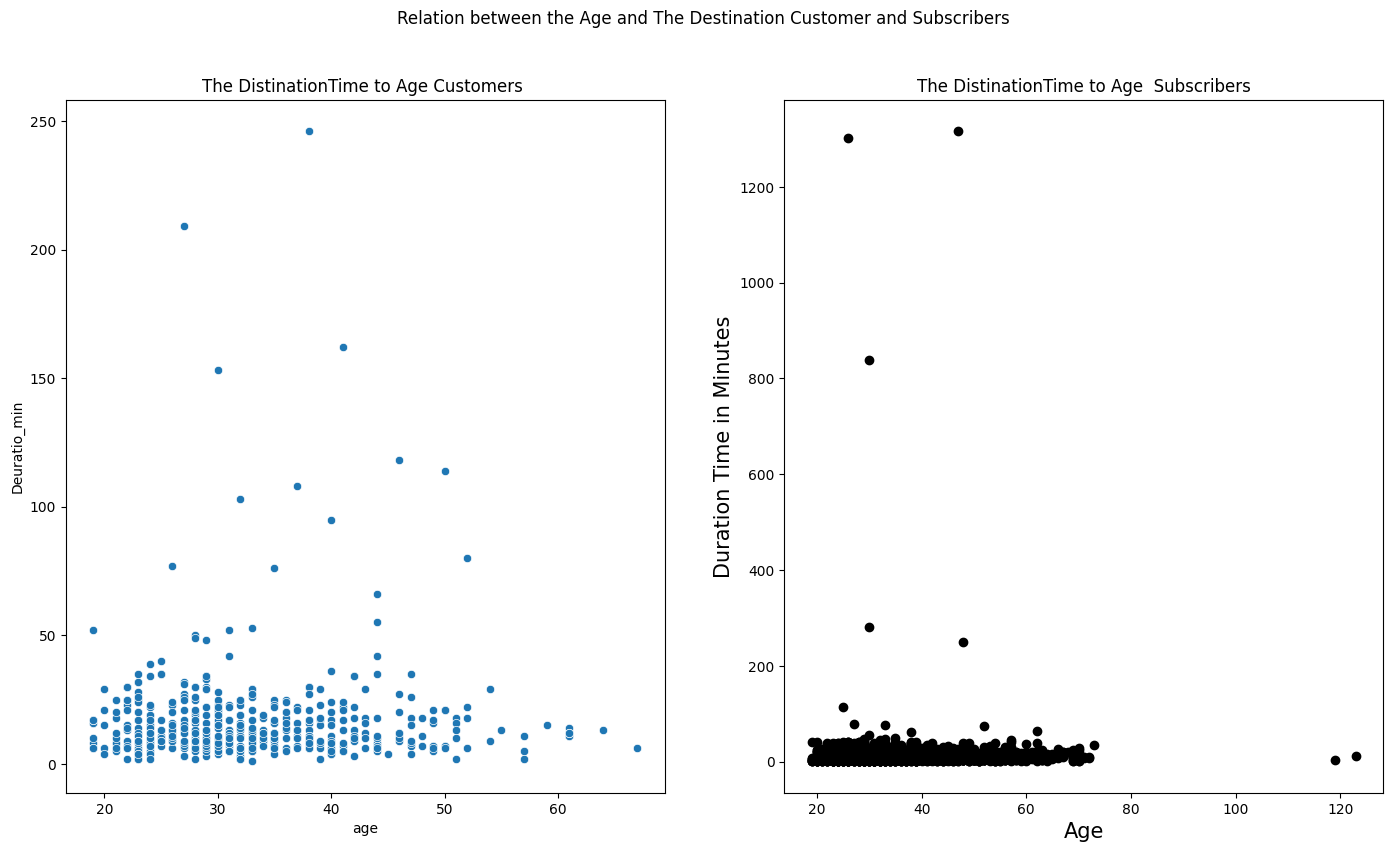

In [56]:
plt.figure(figsize = (17,9))
plt.suptitle("Relation between the Age and The Destination Customer and Subscribers")
plt.subplot(1,2,1)
plt.title("The DistinationTime to Age Customers ")
sns.scatterplot(data  = df_Customers ,
                x = 'age',
                y = 'Deuratio_min')



plt.subplot(1,2,2)
plt.title("The DistinationTime to Age  Subscribers")
plt.scatter(data  = df_Subscriber,
                x= 'age',
                y= 'Deuratio_min' ,color = 'black')
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Duration Time in Minutes",fontsize = 15)

plt.show()

# **Gender Vs duration Time ?**

In [57]:
df

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Start_time,end_Time,start_day,end_day,Deuratio_min
0,368,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749.0,Subscriber,Female,No,30,22:33:55.155000,12:32:20.454000,Tuesday,Wednesday,838
2,64,5th St at Brannan St,64.0,5th St at Brannan St,258.0,Subscriber,Male,No,26,10:32:46.489000,08:13:58.975000,Tuesday,Wednesday,1301
3,67,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974.0,Subscriber,Male,No,47,10:00:51.550000,07:57:01.262000,Tuesday,Wednesday,1316
4,124,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877.0,Subscriber,Male,No,46,23:59:04.739000,00:17:53.091000,Tuesday,Wednesday,18
5,243,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234.0,Customer,Male,No,22,23:53:05.982000,00:16:14.313000,Tuesday,Wednesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,384,Jackson St at Polk St,61.0,Howard St at 8th St,2446.0,Subscriber,Male,No,27,10:39:56.880000,10:52:17.610000,Tuesday,Tuesday,12
4862,22,Howard St at Beale St,50.0,2nd St at Townsend St,2999.0,Subscriber,Female,No,31,10:44:24.586000,10:52:03.832000,Tuesday,Tuesday,7
4863,188,Dover St at 57th St,340.0,Harmon St at Adeline St,1320.0,Subscriber,Male,No,35,10:46:34.785000,10:51:59.714000,Tuesday,Tuesday,5
4864,61,Howard St at 8th St,79.0,7th St at Brannan St,2306.0,Subscriber,Male,No,45,10:44:50.258000,10:51:40.406000,Tuesday,Tuesday,6


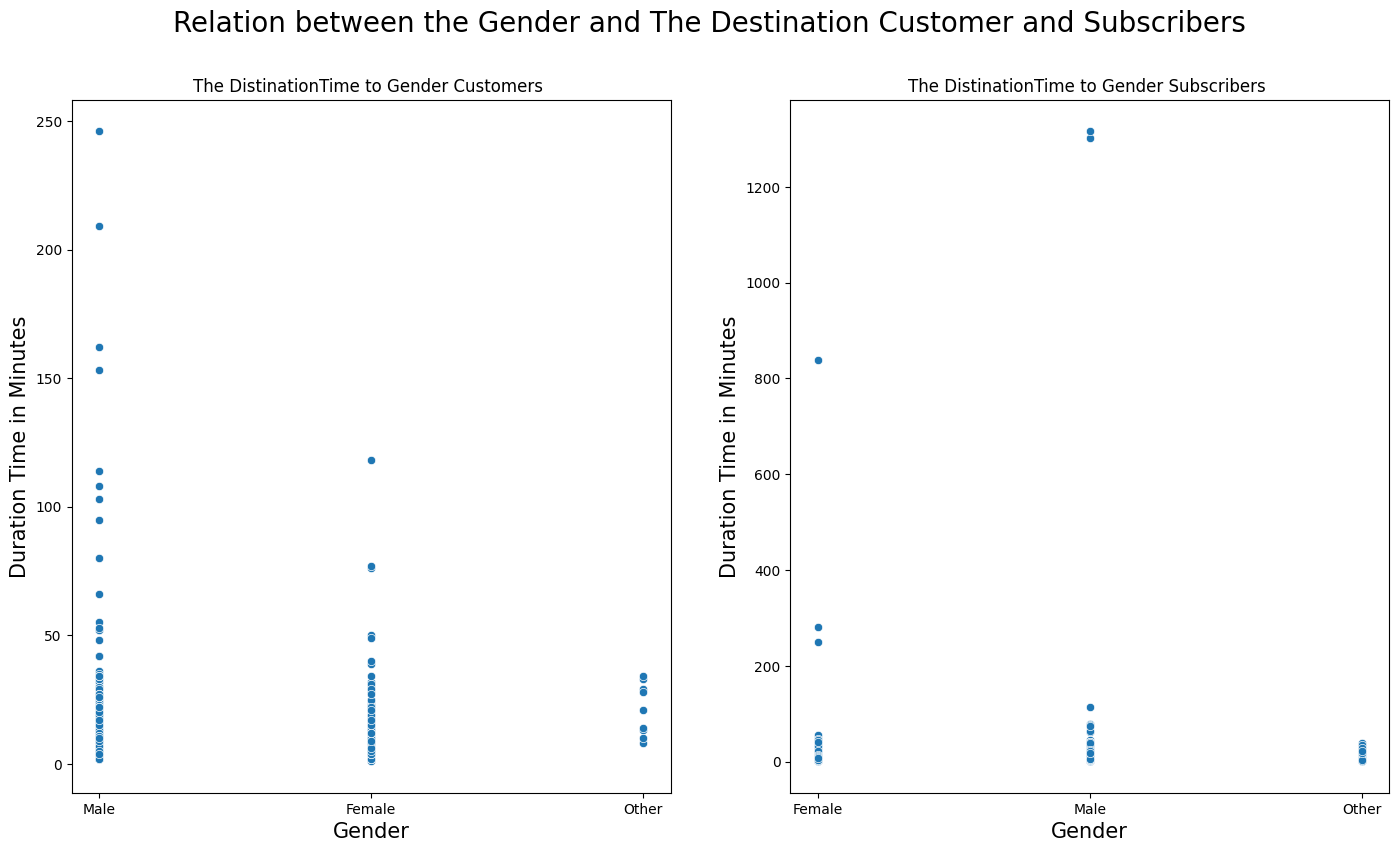

In [62]:
plt.figure(figsize = (17,9))
plt.suptitle("Relation between the Gender and The Destination Customer and Subscribers",fontsize = 20)
plt.subplot(1,2,1)
plt.title("The DistinationTime to Gender Customers ")
sns.scatterplot(data  = df_Customers ,
                x = 'member_gender',
                y = 'Deuratio_min')

plt.xlabel("Gender",fontsize = 15)
plt.ylabel("Duration Time in Minutes",fontsize = 15)

plt.subplot(1,2,2)
plt.title("The DistinationTime to Gender Subscribers ")
sns.scatterplot(data  = df_Subscriber ,
                x = 'member_gender',
                y = 'Deuratio_min')
plt.xlabel("Gender",fontsize = 15)
plt.ylabel("Duration Time in Minutes",fontsize = 15)

plt.show()